# Lab 7.1: Нейронні мережі в розпізнаванні образів. Частина 1
### Шевченко Юлія, ФІ-31мн

In [1]:
# All the imports for the task
import os

import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Step 1: Visualize some examples and count images for each class
data_dir = '../Lab_7/traffic_signs_set'
classes = os.listdir(data_dir)
num_images_per_class = {}

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_dir))
    num_images_per_class[class_name] = num_images
    print(f"Class: {class_name}, Number of Images: {num_images}")

Class: class_id_0, Number of Images: 2220
Class: class_id_1, Number of Images: 2250


In [3]:
# Step 2: Define the model with one single neuron
def create_single_neuron_model(input_shape):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [4]:
# Step 3: Train the model with one single neuron
def train_model(model, X_train, y_train, X_val, y_val, batch_size=32, epochs=10):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[checkpoint])
    return history

In [5]:
# Step 4: Load and preprocess the data
image_size = (32, 32)
batch_size = 32

def load_and_preprocess_data(data_dir, image_size):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', subset='training')
    val_generator = datagen.flow_from_directory(data_dir, target_size=image_size, batch_size=batch_size, class_mode='binary', subset='validation')
    return train_generator, val_generator

In [6]:
train_generator, val_generator = load_and_preprocess_data(data_dir, image_size)

Found 3576 images belonging to 2 classes.
Found 894 images belonging to 2 classes.


In [7]:
# Step 5: Split the data into training and validation sets
# No need to do this since we're using data generators

In [8]:
# Step 6: Create and compile the model
model = create_single_neuron_model(input_shape=(image_size[0], image_size[1], 3))  # 3 for RGB channels
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1)                 3073      
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Step 7: Train the model
history = train_model(model, train_generator, None, val_generator, None, batch_size=batch_size)

Epoch 1/10
106/112 [===========================>..] - ETA: 0s - loss: 0.6546 - accuracy: 0.6161
Epoch 1: val_accuracy improved from -inf to 0.63647, saving model to best_model.keras
112/112 [==============================] - 2s 11ms/step - loss: 0.6509 - accuracy: 0.6214 - val_loss: 0.6325 - val_accuracy: 0.6365
Epoch 2/10
106/112 [===========================>..] - ETA: 0s - loss: 0.5475 - accuracy: 0.7674
Epoch 2: val_accuracy did not improve from 0.63647
112/112 [==============================] - 1s 10ms/step - loss: 0.5459 - accuracy: 0.7671 - val_loss: 0.6052 - val_accuracy: 0.6242
Epoch 3/10
106/112 [===========================>..] - ETA: 0s - loss: 0.4843 - accuracy: 0.8251
Epoch 3: val_accuracy improved from 0.63647 to 0.82215, saving model to best_model.keras
112/112 [==============================] - 1s 10ms/step - loss: 0.4832 - accuracy: 0.8275 - val_loss: 0.4878 - val_accuracy: 0.8221
Epoch 4/10
112/112 [==============================] - ETA: 0s - loss: 0.4352 - accuracy: 0

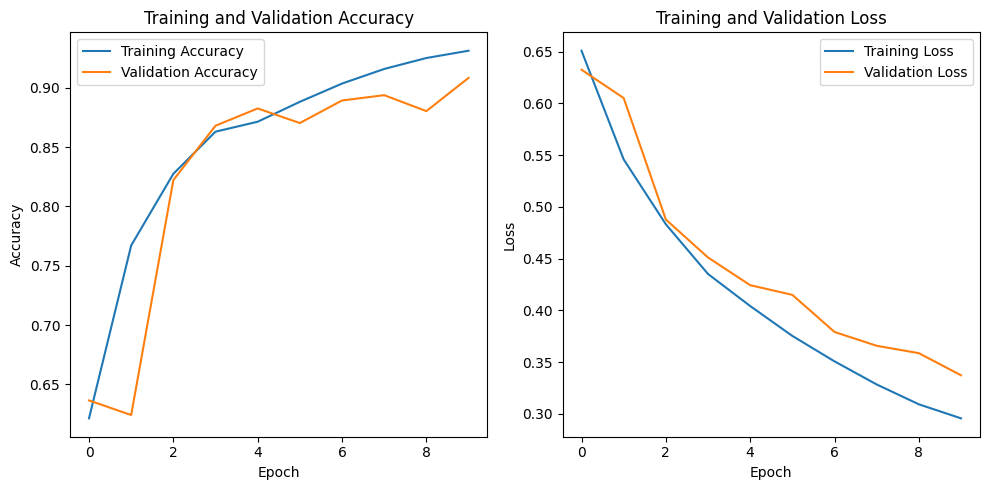

In [10]:
# Step 8: Plot the training history to see accuracy and loss curves
def plot_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [11]:
# Step 9: Evaluate the model on the test set
def evaluate_model(model, test_generator):
    model.load_weights('best_model.keras')
    loss, accuracy = model.evaluate(test_generator)
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

In [12]:
# Step 10: Further modifications to improve the accuracy
# You can try different architectures, optimizers, learning rates, etc.

In [13]:
# Test the model
test_generator = val_generator
evaluate_model(model, test_generator)

28/28 [==============================] - 0s 8ms/step - loss: 0.3373 - accuracy: 0.9083
Test Loss: 0.33727961778640747, Test Accuracy: 0.9082773923873901
